# Radar Charts in Matplotlib

Tutorial: [Alex](https://www.pythoncharts.com/matplotlib/radar-charts/)

## Import module and dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from vega_datasets import data

In [ ]:
df = data.cars()
df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Name                  406 non-null    object        
 1   Miles_per_Gallon      398 non-null    float64       
 2   Cylinders             406 non-null    int64         
 3   Displacement          406 non-null    float64       
 4   Horsepower            400 non-null    float64       
 5   Weight_in_lbs         406 non-null    int64         
 6   Acceleration          406 non-null    float64       
 7   Year                  406 non-null    datetime64[ns]
 8   Origin                406 non-null    object        
 9   Acceleration_Adj      406 non-null    float64       
 10  Displacement_Adj      406 non-null    float64       
 11  Horsepower_Adj        400 non-null    float64       
 12  Miles_per_Gallon_Adj  398 non-null    float64       
 13  Weight_in_lbs_Adj   

## Transform attribute into 0-100 scale

In [ ]:
# Column that will be scaled
factors = ['Acceleration', 'Displacement', 'Horsepower',
           'Miles_per_Gallon', 'Weight_in_lbs']

# Scaling variable (0-100)
new_max = 100
new_min = 0
new_range = new_max - new_min

In [ ]:
# Make a linear transformation
for factor in factors:
  max_val = df[factor].max()
  min_val = df[factor].min()
  val_range = max_val - min_val
  df[factor + '_Adj'] = df[factor].apply(
      lambda x: (((x - min_val) * new_range) / val_range) + new_min)

In [ ]:
# Add year to the name of car for differnciencies
df['Car Model'] = df.apply(lambda row: '{} {}'.format(row.Name, row.Year.year), axis=1)

In [ ]:
# Trim down to cols we want and rename to be nicer
dft = df.loc[:, ['Car Model', 'Acceleration_Adj', 'Displacement_Adj',
                 'Horsepower_Adj', 'Miles_per_Gallon_Adj',
                 'Weight_in_lbs_Adj']]

dft.rename(columns={
    'Acceleration_Adj':'Acceleration',
    'Displacement_Adj':'Displacement',
    'Horsepower_Adj':'Horsepower',
    'Miles_per_Gallon_Adj':'MPG',
    'Weight_in_lbs_Adj':'Weight'
}, inplace=True)

dft.set_index('Car Model', inplace=True)
dft.head()

,Acceleration,Displacement,Horsepower,MPG,Weight
Car Model,,,,,
chevrolet chevelle malibu 1970,23.809524,61.757106,45.652174,23.936170,53.614970
buick skylark 320 1970,20.833333,72.868217,64.673913,15.957447,58.973632
plymouth satellite 1970,17.857143,64.599483,56.521739,23.936170,51.686986
amc rebel sst 1970,23.809524,60.981912,56.521739,18.617021,51.601928
ford torino 1970,14.880952,60.465116,51.086957,21.276596,52.055571


## Build the Radar Chart

In [ ]:
# Each attribute we'll plot into radar chart
labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']

# Ploting ford torino 1970
values = dft.loc['ford torino 1970'].tolist()

# Number of variables for plotting
num_vars = len(labels)

# Split the circle into even parts and save the angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

In [ ]:
values

[14.88095238095238,
 60.46511627906977,
 51.08695652173913,
 21.27659574468085,
 52.05557130705982]

In [ ]:
num_vars

5

In [ ]:
angles

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669]

In [ ]:
# Plot a circle, for completing the loop and append start valie to the end
values += values[:1]
angles += angles[:1]

In [ ]:
values

[14.88095238095238,
 60.46511627906977,
 51.08695652173913,
 21.27659574468085,
 52.05557130705982,
 14.88095238095238]

In [ ]:
angles

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669,
 0.0]

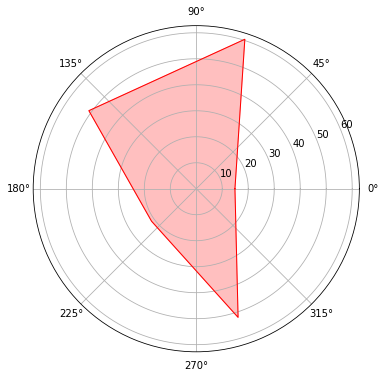

In [ ]:
# Build subplot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of the data
ax.plot(angles, values, color='red', linewidth=1)

# Fill it
ax.fill(angles, values, color='red', alpha=0.25)

## Fix the axes

In [ ]:
# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label
ax.set_thetagrids(np.degrees(angles), labels)

(<a list of 12 Line2D ticklines objects>,
 <a list of 6 Text major ticklabel objects>)

In [ ]:
# Go through labels and adjust alignment based on the circle
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

In [ ]:
# Ensure radar from 0 to 100
ax.set_ylim(0, 100)

# Set gridlines manually
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle of first two axes
ax.set_rlabel_position(180 / num_vars)

## Plot again

Text(0.5, 1.08, 'plymouth satellite 1970')

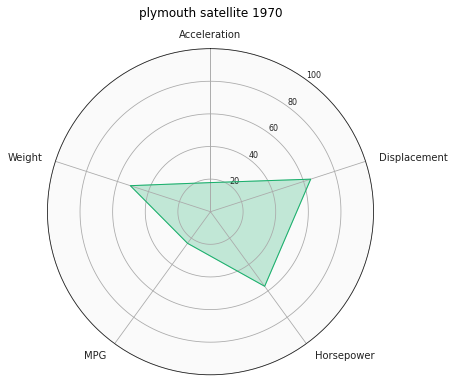

In [ ]:
# Each attribute in radar chart
labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']

# Car we looking for
car = 'plymouth satellite 1970'
values = dft.loc[car].tolist()

# Number of variables
num_vars = len(labels)

# Split circle into even parts 
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop and append start value to the end
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

# Draw the outline of the data
ax.plot(angles, values, color='#1aaf6c', linewidth=1)

# Fill it
ax.fill(angles, values, color='#1aaf6c', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on the circle
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar from 0 to 100
ax.set_ylim(0, 100)

# Set gridlines manually
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle of first two axes
ax.set_rlabel_position(180 / num_vars)

## Add more styling

# Change the color of the tick labels
ax.tick_params(colors='#222222')

# Make the y-axis (0-100) labels smaller
ax.tick_params(axis='y', labelsize=8)

# Change the color of circular gridlines
ax.grid(color='#AAAAAA')

# Change the color of outermost gridline (the spine)
ax.spines['polar'].set_color('#222222')

# Change the background color inside the circle
ax.set_facecolor('#FAFAFA')

# Giving the chart title and padding
ax.set_title(car, y=1.08)

## Comparing Entities

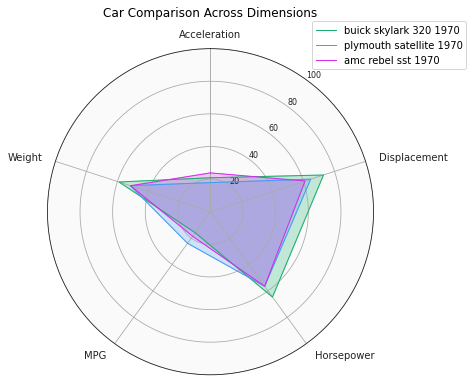

In [ ]:
# Each attribute in radar chart
labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']

# Number of variables
num_vars = len(labels)

# Split circle into even parts 
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop and append start value to the end
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart
def add_to_radar(car_model, color):
  values = dft.loc[car_model].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=car_model)
  ax.fill(angles, values, color=color, alpha=0.25)

# Adding car to the chart
add_to_radar('buick skylark 320 1970', '#1aaf6c')
add_to_radar('plymouth satellite 1970', '#429bf4')
add_to_radar('amc rebel sst 1970', '#d42cea')

# # Draw the outline of the data
# ax.plot(angles, values, color='#1aaf6c', linewidth=1)

# # Fill it
# ax.fill(angles, values, color='#1aaf6c', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on the circle
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar from 0 to 100
ax.set_ylim(0, 100)

# Set gridlines manually
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle of first two axes
ax.set_rlabel_position(180 / num_vars)

## Add more styling

# Change the color of the tick labels
ax.tick_params(colors='#222222')

# Make the y-axis (0-100) labels smaller
ax.tick_params(axis='y', labelsize=8)

# Change the color of circular gridlines
ax.grid(color='#AAAAAA')

# Change the color of outermost gridline (the spine)
ax.spines['polar'].set_color('#222222')

# Change the background color inside the circle
ax.set_facecolor('#FAFAFA')

# Giving the chart title and padding
ax.set_title('Car Comparison Across Dimensions', y=1.08)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

In [45]:
dft.tail()

,Acceleration,Displacement,Horsepower,MPG,Weight
Car Model,,,,,
ford mustang gl 1982,45.238095,18.604651,21.739130,47.872340,33.371137
vw pickup 1982,98.809524,7.493540,3.260870,93.085106,14.658350
dodge rampage 1982,21.428571,17.312661,20.652174,61.170213,19.336547
ford ranger 1982,63.095238,13.436693,17.934783,50.531915,28.692940
chevy s-10 1982,67.857143,13.178295,19.565217,58.510638,31.386447


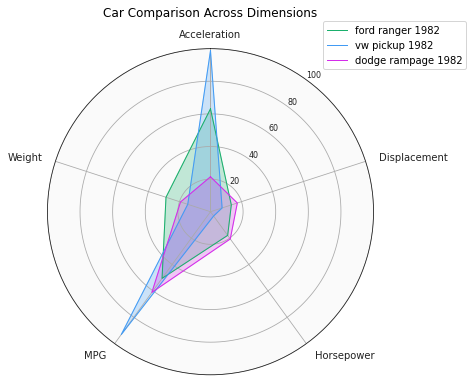

In [41]:
# Each attribute in radar chart
labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']

# Number of variables
num_vars = len(labels)

# Split circle into even parts 
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop and append start value to the end
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart
def add_to_radar(car_model, color):
  values = dft.loc[car_model].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=car_model)
  ax.fill(angles, values, color=color, alpha=0.25)

# Adding car to the chart
add_to_radar('ford ranger 1982', '#1aaf6c')
add_to_radar('vw pickup 1982', '#429bf4')
add_to_radar('dodge rampage 1982', '#d42cea')

# # Draw the outline of the data
# ax.plot(angles, values, color='#1aaf6c', linewidth=1)

# # Fill it
# ax.fill(angles, values, color='#1aaf6c', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on the circle
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar from 0 to 100
ax.set_ylim(0, 100)

# Set gridlines manually
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle of first two axes
ax.set_rlabel_position(180 / num_vars)

## Add more styling

# Change the color of the tick labels
ax.tick_params(colors='#222222')

# Make the y-axis (0-100) labels smaller
ax.tick_params(axis='y', labelsize=8)

# Change the color of circular gridlines
ax.grid(color='#AAAAAA')

# Change the color of outermost gridline (the spine)
ax.spines['polar'].set_color('#222222')

# Change the background color inside the circle
ax.set_facecolor('#FAFAFA')

# Giving the chart title and padding
ax.set_title('Car Comparison Across Dimensions', y=1.08)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))